# FIFA World Cup Analysis

### This analysis is about team performances in the latest 2022 FIFA World CUp where it involve finding the team with the most wins, the players and team with the most goals and goal distribution in the competition. The data is provided by [ MART JÜRISOO](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017) under the [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/).

This dataset includes 45,315 results of international football matches starting from the very first official match in 1872 up to 2023. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

results.csv includes the following columns:

- **date** - date of the match
- **home_team** - the name of the home team
- **away_team** - the name of the away team
- **home_score** - full-time home team score including extra time, not including penalty-shootouts
- **away_score** - full-time away team score including extra time, not including penalty-shootouts
- **tournament** - the name of the tournament
- **city** - the name of the city/town/administrative unit where the match was played
- **country** - the name of the country where the match was played
- **neutral** - TRUE/FALSE column indicating whether the match was played at a neutral venue

shootouts.csv includes the following columns:

- **date** - date of the match
- **home_team** - the name of the home team
- **away_team** - the name of the away team
- **winner** - winner of the penalty-shootout
- **first_shooter** - the team that went first in the shootout

goalscorers.csv includes the following columns:

- **date** - date of the match
- **home_team** - the name of the home team
- **away_team** - the name of the away team
- **team** - name of the team scoring the goal
- **scorer** - name of the player scoring the goal
- **own_goal** - whether the goal was an own-goal
- **penalty** - whether the goal was a penalty

## Data Cleaning

This analysis will be using only data from FIFA World Cup from the year 2022 So the starting date will be from 2022-11-20 to 2022-12-18

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from datetime import datetime

In [2]:
result = pd.read_csv('C:\\Users\\Kaggle\\results.csv')
scorers = pd.read_csv('C:\\Users\\Kaggle\\goalscorers.csv')
penalty = pd.read_csv('C:\\Users\\Kaggle\\shootouts.csv')

In [3]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45315 entries, 0 to 45314
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        45315 non-null  object
 1   home_team   45315 non-null  object
 2   away_team   45315 non-null  object
 3   home_score  45315 non-null  int64 
 4   away_score  45315 non-null  int64 
 5   tournament  45315 non-null  object
 6   city        45315 non-null  object
 7   country     45315 non-null  object
 8   neutral     45315 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


In [4]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
result['date'] = pd.to_datetime(result['date'], format='%Y-%m-%d')

In [6]:
result.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [7]:
result[result.isna().any(axis=1)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


In [8]:
result["year"] = result["date"].dt.year

In [9]:
result["tournament"].unique()


array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Copa Lipton', 'Copa Newton', 'Copa Premio Honor Argentino',
       'Copa Premio Honor Uruguayo', 'Copa Roca', 'Copa América',
       'Copa Chevallier Boutell', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFC Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Ju

In [10]:
result = result.loc[result["tournament"] == "FIFA World Cup"]

In [11]:
result

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930
...,...,...,...,...,...,...,...,...,...,...
44349,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True,2022
44351,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,2022
44352,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True,2022
44356,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,2022


In [12]:
result = result.loc[result["year"] == 2022]

In [13]:
result= result.drop("neutral", axis=1)

In [14]:
result

,date,home_team,away_team,home_score,away_score,tournament,city,country,year
44289,2022-11-20,Qatar,Ecuador,0,2,FIFA World Cup,Al Khor,Qatar,2022
44290,2022-11-21,Senegal,Netherlands,0,2,FIFA World Cup,Doha,Qatar,2022
44291,2022-11-21,England,Iran,6,2,FIFA World Cup,Al Rayyan,Qatar,2022
44292,2022-11-21,United States,Wales,1,1,FIFA World Cup,Al Rayyan,Qatar,2022
44293,2022-11-22,Argentina,Saudi Arabia,1,2,FIFA World Cup,Lusail,Qatar,2022
...,...,...,...,...,...,...,...,...,...
44349,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,2022
44351,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,2022
44352,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,2022
44356,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,2022


In [15]:
result["total_goals"] = result["home_score"] + result["away_score"]

In [16]:
result

,date,home_team,away_team,home_score,away_score,tournament,city,country,year,total_goals
44289,2022-11-20,Qatar,Ecuador,0,2,FIFA World Cup,Al Khor,Qatar,2022,2
44290,2022-11-21,Senegal,Netherlands,0,2,FIFA World Cup,Doha,Qatar,2022,2
44291,2022-11-21,England,Iran,6,2,FIFA World Cup,Al Rayyan,Qatar,2022,8
44292,2022-11-21,United States,Wales,1,1,FIFA World Cup,Al Rayyan,Qatar,2022,2
44293,2022-11-22,Argentina,Saudi Arabia,1,2,FIFA World Cup,Lusail,Qatar,2022,3
...,...,...,...,...,...,...,...,...,...,...
44349,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,2022,3
44351,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,2022,3
44352,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,2022,2
44356,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,2022,3


### Adding a new column to show the winner of each match

In [17]:
result["winner_fulltime"] = None

In [18]:
result.loc[result["home_score"] > result["away_score"], "winner_fulltime"] = result["home_team"]
result.loc[result["home_score"] < result["away_score"], "winner_fulltime"] = result["away_team"]
result.loc[result["home_score"] == result["away_score"], "winner_fulltime"] = "Tie"

In [20]:
result["winner_fulltime"].value_counts()

winner_fulltime
Tie              15
France            5
Argentina         4
Brazil            3
Portugal          3
England           3
Morocco           3
Netherlands       3
Australia         2
Senegal           2
Croatia           2
Switzerland       2
Japan             2
United States     1
Tunisia           1
Germany           1
Cameroon          1
Mexico            1
Uruguay           1
Ecuador           1
Poland            1
Ghana             1
Costa Rica        1
Iran              1
Belgium           1
Spain             1
Saudi Arabia      1
South Korea       1
Name: count, dtype: int64

------------------------------------------------

------------------------------------------------

In [21]:
scorers['date'] = pd.to_datetime(scorers['date'], format='%Y-%m-%d')

In [22]:
scorers["year"] = scorers["date"].dt.year

In [23]:
scorers = scorers.loc[(scorers["date"] >= '2022-11-20') & (scorers["date"] <= '2022-12-18')]

In [24]:
scorers

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year
42223,2022-11-20,Qatar,Ecuador,Ecuador,Enner Valencia,16.0,False,True,2022
42224,2022-11-20,Qatar,Ecuador,Ecuador,Enner Valencia,31.0,False,False,2022
42225,2022-11-21,England,Iran,England,Jude Bellingham,35.0,False,False,2022
42226,2022-11-21,England,Iran,England,Bukayo Saka,43.0,False,False,2022
42227,2022-11-21,England,Iran,England,Raheem Sterling,45.0,False,False,2022
...,...,...,...,...,...,...,...,...,...
42390,2022-12-18,Argentina,France,Argentina,Ángel Di María,36.0,False,False,2022
42391,2022-12-18,Argentina,France,France,Kylian Mbappé,80.0,False,True,2022
42392,2022-12-18,Argentina,France,France,Kylian Mbappé,81.0,False,False,2022
42393,2022-12-18,Argentina,France,Argentina,Lionel Messi,109.0,False,False,2022


In [25]:
scorers.isna().sum()

date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
year         0
dtype: int64

-------------------------------------------------

-------------------------------------------------

In [26]:
penalty

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN
...,...,...,...,...,...
557,2023-07-12,United States,Panama,Panama,NaN
558,2023-09-07,Iraq,India,Iraq,NaN
559,2023-09-10,Thailand,Iraq,Iraq,NaN
560,2023-10-13,Iraq,Qatar,Qatar,NaN


In [27]:
penalty["date"] = pd.to_datetime(penalty["date"], format="%Y-%m-%d")

In [28]:
penalty= penalty.loc[(penalty["date"] >= "2022-11-20") & (penalty["date"] <= "2022-12-18") ]

In [29]:
penalty

,date,home_team,away_team,winner,first_shooter
542,2022-12-05,Japan,Croatia,Croatia,Japan
543,2022-12-06,Morocco,Spain,Morocco,Morocco
544,2022-12-09,Croatia,Brazil,Croatia,Croatia
545,2022-12-09,Netherlands,Argentina,Argentina,Netherlands
546,2022-12-18,Argentina,France,Argentina,France


### Merging results table and penalty table to get the match winners that played after extra time

In [30]:
results = pd.merge(result, penalty, on= ["date","home_team","away_team"], how= "left" )

In [31]:
results.loc[results["winner_fulltime"] == "Tie"]

,date,home_team,away_team,home_score,away_score,tournament,city,country,year,total_goals,winner_fulltime,winner,first_shooter
3,2022-11-21,United States,Wales,1,1,FIFA World Cup,Al Rayyan,Qatar,2022,2,Tie,NaN,NaN
5,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,Qatar,2022,0,Tie,NaN,NaN
6,2022-11-22,Denmark,Tunisia,0,0,FIFA World Cup,Al Rayyan,Qatar,2022,0,Tie,NaN,NaN
10,2022-11-23,Morocco,Croatia,0,0,FIFA World Cup,Al Khor,Qatar,2022,0,Tie,NaN,NaN
14,2022-11-24,Uruguay,South Korea,0,0,FIFA World Cup,Al Rayyan,Qatar,2022,0,Tie,NaN,NaN
17,2022-11-25,Netherlands,Ecuador,1,1,FIFA World Cup,Al Rayyan,Qatar,2022,2,Tie,NaN,NaN
19,2022-11-25,England,United States,0,0,FIFA World Cup,Al Khor,Qatar,2022,0,Tie,NaN,NaN
25,2022-11-27,Spain,Germany,1,1,FIFA World Cup,Al Khor,Qatar,2022,2,Tie,NaN,NaN
28,2022-11-28,Cameroon,Serbia,3,3,FIFA World Cup,Al Wakrah,Qatar,2022,6,Tie,NaN,NaN
42,2022-12-01,Croatia,Belgium,0,0,FIFA World Cup,Al Rayyan,Qatar,2022,0,Tie,NaN,NaN


In [32]:
results["winner_fulltime"]= results["winner"].where(results["winner"].notna(), results["winner_fulltime"])

In [33]:
results.loc[results["winner_fulltime"] == "Tie"]

,date,home_team,away_team,home_score,away_score,tournament,city,country,year,total_goals,winner_fulltime,winner,first_shooter
3,2022-11-21,United States,Wales,1,1,FIFA World Cup,Al Rayyan,Qatar,2022,2,Tie,NaN,NaN
5,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,Qatar,2022,0,Tie,NaN,NaN
6,2022-11-22,Denmark,Tunisia,0,0,FIFA World Cup,Al Rayyan,Qatar,2022,0,Tie,NaN,NaN
10,2022-11-23,Morocco,Croatia,0,0,FIFA World Cup,Al Khor,Qatar,2022,0,Tie,NaN,NaN
14,2022-11-24,Uruguay,South Korea,0,0,FIFA World Cup,Al Rayyan,Qatar,2022,0,Tie,NaN,NaN
17,2022-11-25,Netherlands,Ecuador,1,1,FIFA World Cup,Al Rayyan,Qatar,2022,2,Tie,NaN,NaN
19,2022-11-25,England,United States,0,0,FIFA World Cup,Al Khor,Qatar,2022,0,Tie,NaN,NaN
25,2022-11-27,Spain,Germany,1,1,FIFA World Cup,Al Khor,Qatar,2022,2,Tie,NaN,NaN
28,2022-11-28,Cameroon,Serbia,3,3,FIFA World Cup,Al Wakrah,Qatar,2022,6,Tie,NaN,NaN
42,2022-12-01,Croatia,Belgium,0,0,FIFA World Cup,Al Rayyan,Qatar,2022,0,Tie,NaN,NaN


In [34]:
results= results.drop(columns= "winner")

# EDA

This step we will look only into goals performance and wins

In [35]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             64 non-null     datetime64[ns]
 1   home_team        64 non-null     object        
 2   away_team        64 non-null     object        
 3   home_score       64 non-null     int64         
 4   away_score       64 non-null     int64         
 5   tournament       64 non-null     object        
 6   city             64 non-null     object        
 7   country          64 non-null     object        
 8   year             64 non-null     int32         
 9   total_goals      64 non-null     int64         
 10  winner_fulltime  64 non-null     object        
 11  first_shooter    5 non-null      object        
dtypes: datetime64[ns](1), int32(1), int64(3), object(7)
memory usage: 5.9+ KB


In [58]:
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,year,total_goals,winner_fulltime,first_shooter,competition_stage
0,2022-11-20,Qatar,Ecuador,0,2,FIFA World Cup,Al Khor,Qatar,2022,2,Ecuador,NaN,Group Stage
1,2022-11-21,Senegal,Netherlands,0,2,FIFA World Cup,Doha,Qatar,2022,2,Netherlands,NaN,Group Stage
2,2022-11-21,England,Iran,6,2,FIFA World Cup,Al Rayyan,Qatar,2022,8,England,NaN,Group Stage
3,2022-11-21,United States,Wales,1,1,FIFA World Cup,Al Rayyan,Qatar,2022,2,Tie,NaN,Group Stage
4,2022-11-22,Argentina,Saudi Arabia,1,2,FIFA World Cup,Lusail,Qatar,2022,3,Saudi Arabia,NaN,Group Stage
5,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,Qatar,2022,0,Tie,NaN,Group Stage
6,2022-11-22,Denmark,Tunisia,0,0,FIFA World Cup,Al Rayyan,Qatar,2022,0,Tie,NaN,Group Stage
7,2022-11-22,France,Australia,4,1,FIFA World Cup,Al Wakrah,Qatar,2022,5,France,NaN,Group Stage
8,2022-11-23,Germany,Japan,1,2,FIFA World Cup,Al Rayyan,Qatar,2022,3,Japan,NaN,Group Stage
9,2022-11-23,Spain,Costa Rica,7,0,FIFA World Cup,Doha,Qatar,2022,7,Spain,NaN,Group Stage


In [37]:
results.describe()

,date,home_score,away_score,year,total_goals
count,64,64.000000,64.000000,64.0,64.000000
mean,2022-11-29 11:37:30,1.546875,1.140625,2022.0,2.687500
min,2022-11-20 00:00:00,0.000000,0.000000,2022.0,0.000000
25%,2022-11-24 18:00:00,0.000000,0.000000,2022.0,1.000000
50%,2022-11-28 12:00:00,1.000000,1.000000,2022.0,2.000000
75%,2022-12-02 06:00:00,2.000000,2.000000,2022.0,3.250000
max,2022-12-18 00:00:00,7.000000,4.000000,2022.0,8.000000
std,NaN,1.562758,1.052091,0.0,1.892969


In [38]:
scorers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 42223 to 42394
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       172 non-null    datetime64[ns]
 1   home_team  172 non-null    object        
 2   away_team  172 non-null    object        
 3   team       172 non-null    object        
 4   scorer     172 non-null    object        
 5   minute     172 non-null    float64       
 6   own_goal   172 non-null    object        
 7   penalty    172 non-null    object        
 8   year       172 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 12.8+ KB


In [39]:
scorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year
42223,2022-11-20,Qatar,Ecuador,Ecuador,Enner Valencia,16.0,False,True,2022
42224,2022-11-20,Qatar,Ecuador,Ecuador,Enner Valencia,31.0,False,False,2022
42225,2022-11-21,England,Iran,England,Jude Bellingham,35.0,False,False,2022
42226,2022-11-21,England,Iran,England,Bukayo Saka,43.0,False,False,2022
42227,2022-11-21,England,Iran,England,Raheem Sterling,45.0,False,False,2022


In [40]:
scorers.describe()

,date,minute,year
count,172,172.000000,172.0
mean,2022-11-30 03:20:55.813953536,55.197674,2022.0
min,2022-11-20 00:00:00,2.000000,2022.0
25%,2022-11-25 00:00:00,35.750000,2022.0
50%,2022-11-29 00:00:00,54.500000,2022.0
75%,2022-12-04 00:00:00,77.250000,2022.0
max,2022-12-18 00:00:00,118.000000,2022.0
std,NaN,26.362662,0.0


In [41]:
filtered_result = results[results["winner_fulltime"] != "Tie"]

team_counts = filtered_result["winner_fulltime"].value_counts(ascending=False).head(10)

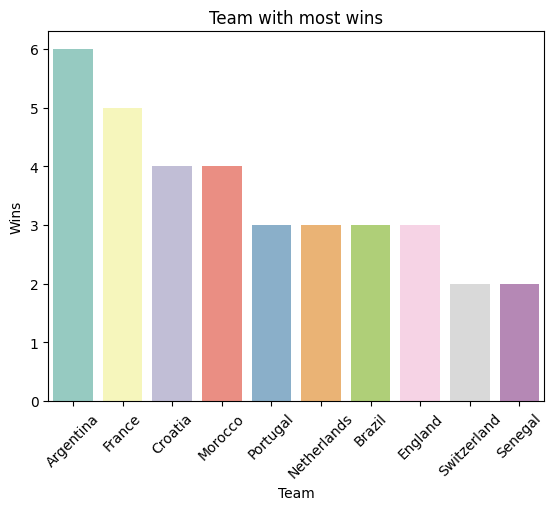

In [42]:
sns.barplot(x=team_counts.index, y=team_counts.values, hue=team_counts.index, palette='Set3', dodge=False)
plt.xlabel('Team')
plt.ylabel('Wins')
plt.title('Team with most wins')

plt.xticks(rotation=45)

plt.show()

In [44]:
results['date'] = pd.to_datetime(results['date'])
results = results.sort_values('date')

partitions = {
    (pd.Timestamp('2022-11-20'), pd.Timestamp('2022-12-02')): 'Group Stage',
    (pd.Timestamp('2022-12-03'), pd.Timestamp('2022-12-06')): 'Round of 16',
    (pd.Timestamp('2022-12-09'), pd.Timestamp('2022-12-10')): 'Quarter Finals',
    (pd.Timestamp('2022-12-13'), pd.Timestamp('2022-12-14')): 'Semi Finals',
    (pd.Timestamp('2022-12-17'), pd.Timestamp('2022-12-17')): 'Third Place',
    (pd.Timestamp('2022-12-18'), pd.Timestamp('2022-12-18')): 'Final',
}

In [45]:
results['competition_stage'] = results['date'].apply(
    lambda date: next((stage for (start, end), stage in partitions.items() if start <= date <= end), None)
)

In [46]:
goal_date = results.groupby(['date', 'competition_stage']).agg({
    "total_goals": "sum",
    "home_score": "sum",
    "away_score": "sum"
}).reset_index()

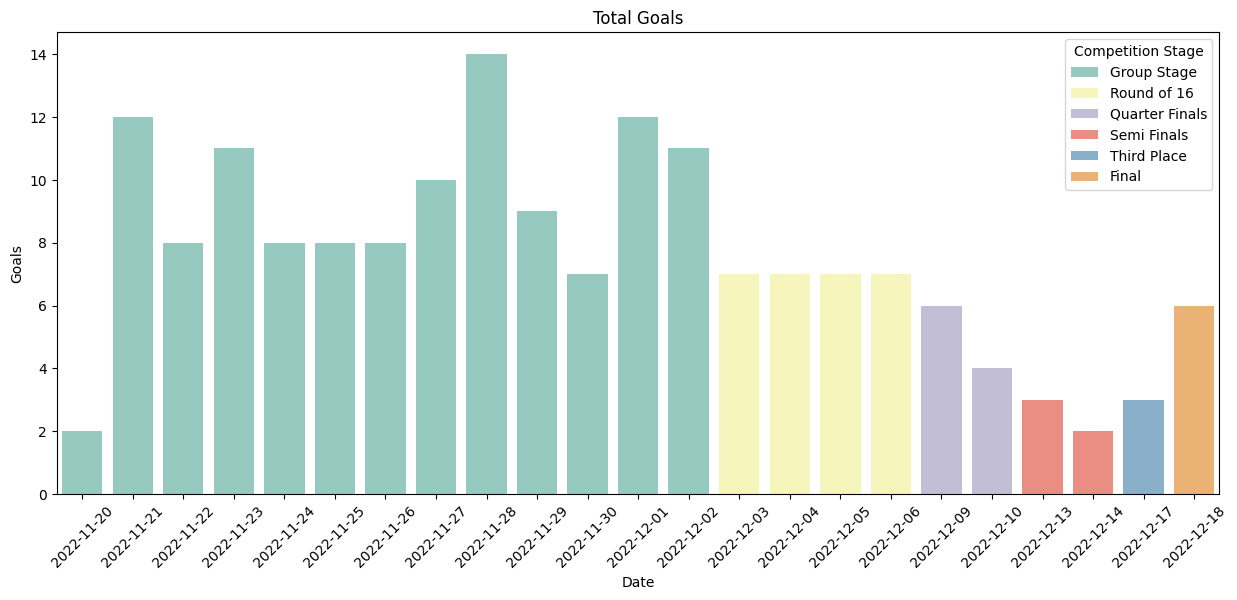

In [47]:
order = ['Group Stage', 'Round of 16', 'Quarter Finals', 'Semi Finals', 'Third Place', 'Final']

plt.figure(figsize=(15, 6))

sns.barplot(x='date', y='total_goals', data=goal_date, hue='competition_stage', hue_order=order, palette="Set3")

plt.xlabel('Date')
plt.ylabel('Goals')
plt.title('Total Goals')

plt.xticks(rotation=45)
plt.legend(title='Competition Stage')

plt.show()

In [49]:
pie_teamscore = scorers["team"].value_counts().head(10)

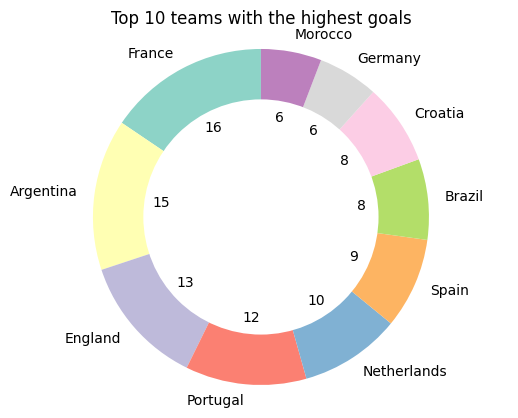

In [50]:
cmap = plt.get_cmap("Set3")
colors = cmap(range(len(pie_teamscore)))

plt.pie(pie_teamscore, labels=pie_teamscore.index, autopct='%1.0f', startangle=90, colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.title("Top 10 teams with the highest goals")

plt.show()

In [51]:
scorers["minute_range"] = pd.cut(
    scorers["minute"],
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')],
    labels=["0-10 min", "11-20 min", "21-30 min", "31-40 min", "41-50 min", "51-60 min", "61-70 min", "71-80 min", "81-90 min", "90+ min"]
)

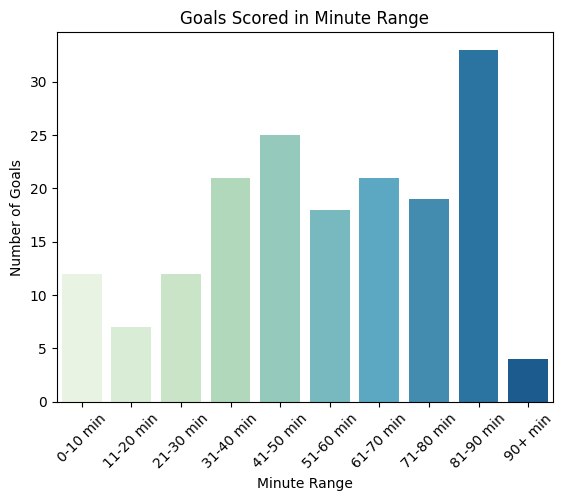

In [52]:
    sns.countplot(x="minute_range", data=scorers, hue= "minute_range", palette= "GnBu")

plt.xlabel('Minute Range')
plt.ylabel('Number of Goals')
plt.title('Goals Scored in Minute Range')

plt.xticks(rotation=45)

plt.show()

In [53]:
Top10 = scorers["scorer"].value_counts().head(10)
TeamGoals = scorers["team"].value_counts()

In [54]:
combined = pd.DataFrame({
    "Player": Top10.index,
    "Individual Goals": Top10.values,
    "Team": scorers.groupby("scorer")["team"].unique()[Top10.index],
    "Team Goals": scorers.groupby("scorer")["team"].apply(lambda x: TeamGoals[x.iloc[0]] if len(x) > 0 and x.iloc[0] in TeamGoals.index else 0)[Top10.index]
})

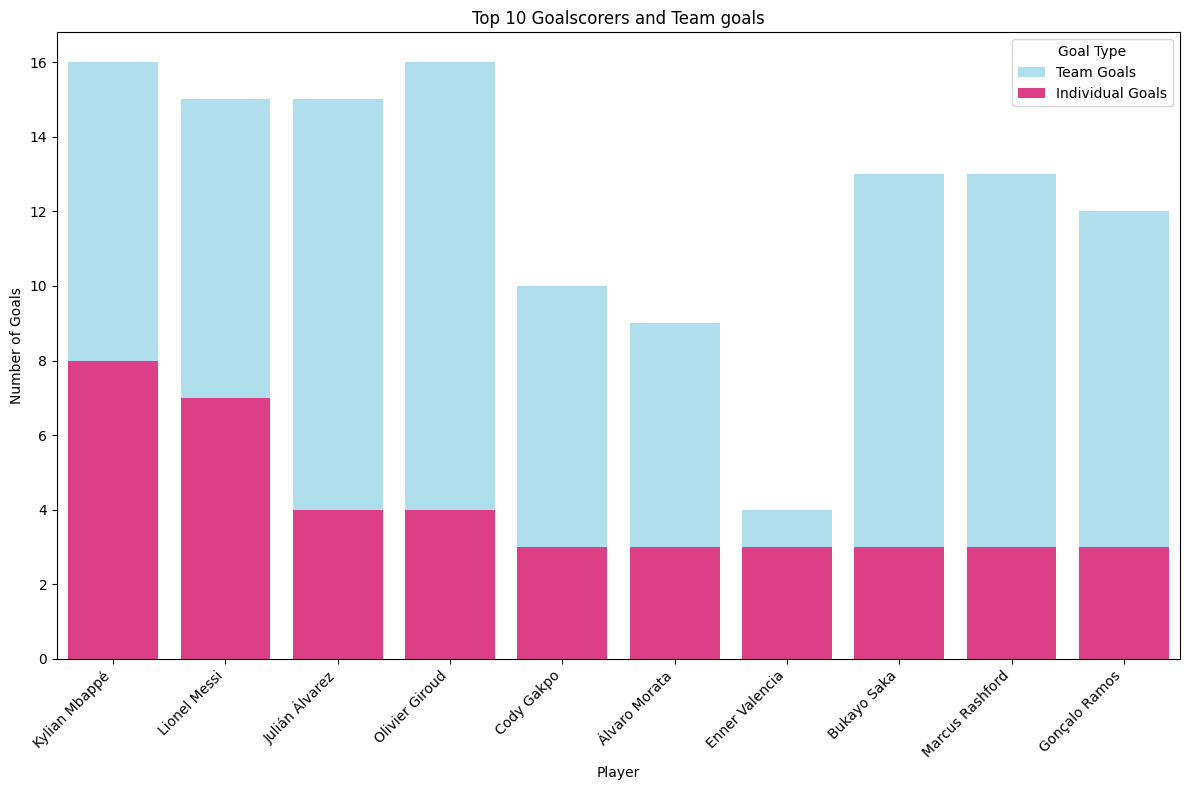

In [56]:
plt.figure(figsize=(12, 8))

sns.barplot(x='Player', y='Team Goals', data=combined, color='#4CC9F0', label='Team Goals', alpha =0.5)
sns.barplot(x='Player', y='Individual Goals', data=combined, color='#F72585', label='Individual Goals')


plt.xlabel('Player')
plt.ylabel('Number of Goals')
plt.title('Top 10 Goalscorers and Team goals')

plt.legend(title='Goal Type')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()